<h1>Võrdlus Eesti keele ühendkorpusega</h1>

In [2]:
# Lisame siia kõik vajalikud import'id
import praw
from datetime import datetime, time
import math
import json
from estnltk.converters import json_to_text
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from estnltk import Text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
import numpy as np
from pandas import DataFrame

<h3>Postitused</h3>

In [38]:
import os, os.path
from estnltk.converters import json_to_text

with open("Eesti_submissions.json", "r", encoding = 'utf-8') as file:
    with open('output.json', 'w', encoding='utf-8') as output_file:
        for line in file:
            rida = json.loads(line)
            #print(rida)
            if "_utc" in rida:
                rida["created_utc"] = str(datetime.fromtimestamp(int(rida["_utc"])))
                del rida['_utc']
            else:
                rida["created_utc"] = str(datetime.fromtimestamp(int(rida["created_utc"])))
                
            if "retrieved_on" in rida:
                rida["retrieved_on"] = str(datetime.fromtimestamp(int(rida["retrieved_on"])))
            #print(rida)
            
            #############faili kirjutamine###########
            json_string = json.dumps(rida, ensure_ascii=False)
            output_file.write(json_string)
            output_file.write('\n')
            ##########################################
            

In [3]:
created_at = []
ids = []
with open("output.json", "r", encoding = 'utf-8') as file:
    for line in file:
        rida = json.loads(line)
        created_at.append(rida['created_utc'])
        ids.append(rida["id"])


44118
['2010-01-06 20:18:47', '2010-02-15 11:27:38']


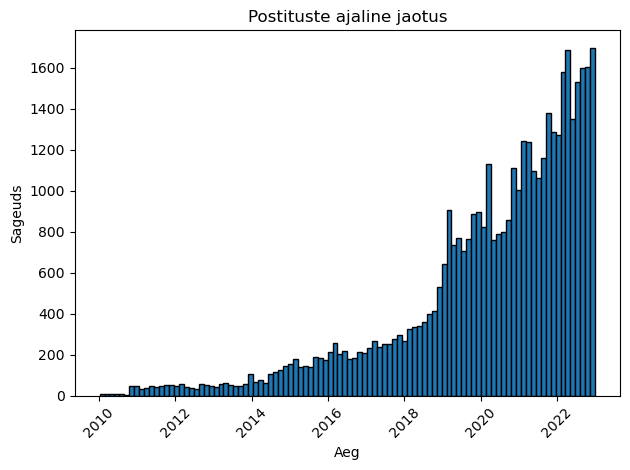

In [4]:
print(len(created_at))
print(created_at[:2])
dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in created_at]

sorted_dates = sorted(dates)

plt.hist(sorted_dates, bins=100, edgecolor='black')
plt.xlabel('Aeg')
plt.ylabel('Sageuds')
plt.title('Postituste ajaline jaotus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Kommentaarid</h3>

In [5]:
import os, os.path
from estnltk.converters import json_to_text

with open("Eesti_comments.json", "r", encoding = 'utf-8') as file:
    with open('comments_output.json', 'w', encoding='utf-8') as output_file:
        for line in file:
            rida = json.loads(line)
            #print(rida)

            if "_utc" in rida:
                rida["created_utc"] = str(datetime.fromtimestamp(int(rida["_utc"])))
                del rida['_utc']
            else:
                rida["created_utc"] = str(datetime.fromtimestamp(int(rida["created_utc"])))
                
            if "retrieved_on" in rida:
                rida["retrieved_on"] = str(datetime.fromtimestamp(int(rida["retrieved_on"])))
            #print(rida)
            if 'author_created_utc' in rida:
                if rida["author_created_utc"] is not None:
                    rida["author_created_utc"] = str(datetime.fromtimestamp(int(rida["author_created_utc"])))
            
            
            #############faili kirjutamine###########
            json_string = json.dumps(rida, ensure_ascii=False)
            output_file.write(json_string)
            output_file.write('\n')
            ##########################################
            

In [4]:
com_created_at = []
com_ids = []
with open("comments_output.json", "r", encoding = 'utf-8') as file:
    for line in file:
        rida = json.loads(line)
        com_created_at.append(rida['created_utc'])
        com_ids.append(rida["id"])

679562
['2010-01-08 02:20:21', '2010-02-17 13:58:20']


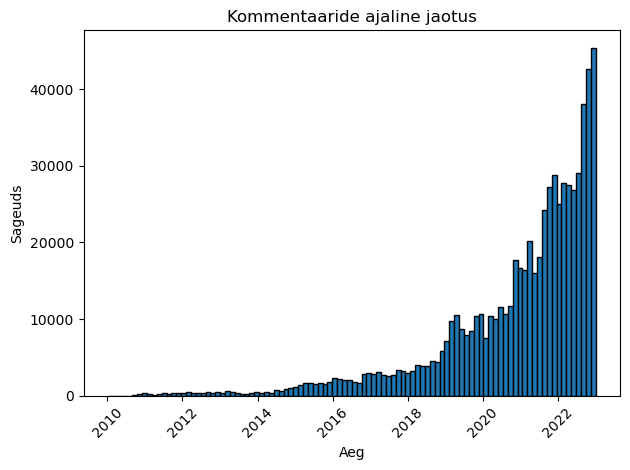

In [8]:
print(len(com_created_at))
print(com_created_at[:2])
dates_com = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in com_created_at]

sorted_dates_com = sorted(dates_com)

plt.hist(sorted_dates_com, bins=100, edgecolor='black')
plt.xlabel('Aeg')
plt.ylabel('Sageuds')
plt.title('Kommentaaride ajaline jaotus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

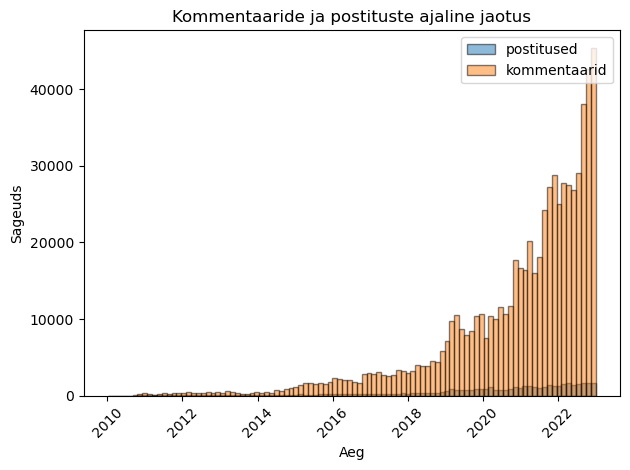

In [12]:
### PANEN POSTITUSED JA KOMMENTAARID SAMALE JOONISELE
plt.hist(sorted_dates, bins=100, edgecolor='black', label="postitused", alpha=0.5)
plt.hist(sorted_dates_com, bins=100, edgecolor='black', label="kommentaarid", alpha=0.5)
plt.xlabel('Aeg')
plt.ylabel('Sageuds')
plt.title('Kommentaaride ja postituste ajaline jaotus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [9]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)

with open("ühendkorpus/nc19_Web_2013.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/" in line:
                if "reddit.com/r/Eesti/comments" in line:
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                else:
                    posts += 1
                    for id in ids:
                        if id in line:
                            posts_in_both += 1
                            
print("kommentaare ühendkorpuses:", comments)
print("ühtivaid kommentaare:", comments_in_both)
print("postitusi ühendkorpuses:", posts)
print("ühtivaid postitusi:", posts_in_both)

kommentaare ühendkorpuses: 0
ühtivaid kommentaare: 0
postitusi ühendkorpuses: 0
ühtivaid postitusi: 0


In [107]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)


with open("data/nc19_Web_2017.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/" in line:
                if "reddit.com/r/Eesti/comments" in line:
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                else:
                    posts += 1
                    for id in ids:
                        if id in line:
                            posts_in_both += 1
                            
print("kommentaare ühendkorpuses:", comments)
print("ühtivaid kommentaare:", comments_in_both)
print("postitusi ühendkorpuses:", posts)
print("ühtivaid postitusi:", posts_in_both)

kommentaare ühendkorpuses: 0
ühtivaid kommentaare: 0
postitusi ühendkorpuses: 0
ühtivaid postitusi: 0


<h3>Uurime palju on eesti keele ühendkorpuse versioonides samu postitusi ja kommentaare, mis meie andmestikuski</h3>

In [18]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)


with open("ühendkorpus/nc19_Web_2013.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/comments" in line:
                    #print(line)
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                    for id in ids:
                        if id in line:
                            posts_in_both += 1
                            
print("ühtivaid kommentaare:", comments_in_both)
print("ühtivaid postitusi:", posts_in_both)

ühtivaid kommentaare: 0
ühtivaid postitusi: 0


In [17]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)


with open("ühendkorpus/nc19_Web_2017.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/comments" in line:
                    #print(line)
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                    for id in ids: 
                        if id in line:
                            posts_in_both += 1
                            

print("ühtivaid kommentaare:", comments_in_both)
print("ühtivaid postitusi:", posts_in_both)

ühtivaid kommentaare: 0
ühtivaid postitusi: 0


In [12]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)


with open("ühendkorpus/nc19_Web_2019.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/comments" in line:
                    #print(line)
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                    for id in ids:
                        if id in line:
                            posts_in_both += 1

                            
print("ühtivaid kommentaare:", comments_in_both)
print("ühtivaid postitusi:", posts_in_both)

ühtivaid kommentaare: 1056
ühtivaid postitusi: 1480


In [16]:
comments = 0
comments_in_both = 0
posts = 0
posts_in_both = 0
com_ids = set(com_ids)
ids = set(ids)


with open("ühendkorpus/nc21_Web_2021.prevert", "r", encoding = 'utf-8') as file:
        for line in file:
            if "reddit.com/r/Eesti/comments" in line:
                    #print(line)
                    comments += 1
                    for id in com_ids:
                        if id in line:
                            comments_in_both += 1
                    for id in ids:
                        if id in line:
                            posts_in_both += 1

                            
print("ühtivaid kommentaare:", comments_in_both)
print("ühtivaid postitusi:", posts_in_both)

ühtivaid kommentaare: 225
ühtivaid postitusi: 470


In [95]:
len(com_ids)

679562